<a href="https://colab.research.google.com/github/bella-xia/Medical_Image/blob/main/Medical_Image_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
!pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import zipfile

In [ ]:
from pickle import dump, load

In [ ]:
import os

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
!pip install pydicom
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.7 MB/s eta 0:00:00


In [ ]:

!pip install -U git+https://github.com/pydicom/pydicom.git
!pip install -U python_gdcm
!pip install -U pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pydicom/pydicom.git to /tmp/pip-req-build-5kpmsczj
  Running command git clone --filter=blob:none --quiet https://github.com/pydicom/pydicom.git /tmp/pip-req-build-5kpmsczj
  Resolved https://github.com/pydicom/pydicom.git to commit 8953d0f48952687f87d52e81c23de5cd266ec29a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdcm
import pylibjpeg
import sys

In [ ]:
from pydicom import dcmread
import pylibjpeg
import gdcm

import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/data.csv')

In [ ]:
df.head()

,StudyInstanceUID,extent_right,density_right,extent_left,density_left,quality_issue,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score
0,1.2.826.0.1.3680043.10.474.419639.280560458539...,>75%,Dense,>75%,Moderate,NaN,4,3,4,2,20
1,1.2.826.0.1.3680043.10.474.419639.316579237354...,51-75%,Dense,51-75%,Moderate,NaN,3,3,3,2,15
2,1.2.826.0.1.3680043.10.474.419639.119686652556...,<=25%,Hazy,<=25%,Hazy,NaN,1,1,1,1,2
3,1.2.826.0.1.3680043.10.474.419639.427770385556...,None,None,None,None,NaN,0,0,0,0,0
4,1.2.826.0.1.3680043.10.474.419639.298049151358...,None,None,None,None,NaN,0,0,0,0,0


In [ ]:
df = df.drop(['extent_right', 'density_right', 'extent_left', 'density_left'], axis=1)

In [ ]:
df = df[df['quality_issue'].isna()]

In [ ]:
df = df.drop(['quality_issue'], axis=1)

In [ ]:
df.head()

,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score
0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20
1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15
2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2
3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0
4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0


In [ ]:
len(df)

2041

In [ ]:
df['check'] = df['StudyInstanceUID'].apply(lambda x: x[:2] == '1.')

In [ ]:
df.iloc[0]['StudyInstanceUID']

'1.2.826.0.1.3680043.10.474.419639.280560458539039379326456252328'

# Import Medical Image Part 1

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_v2.h5', 'rb') as f:
  df = load(f)

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
df['check'] = df['img'].apply(lambda x: len(x) == 0)

In [ ]:
df[df['check'] == True]

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,check,file_names,file_nums,img
612,624,1.2.826.0.1.3680043.10.474.419639.281683063015...,1,1,0,0,1,True,[1.2.826.0.1.3680043.10.474.419639.33057544867...,2,[]
613,625,1.2.826.0.1.3680043.10.474.419639.107528273586...,3,2,3,2,12,True,[1.2.826.0.1.3680043.10.474.419639.20627629528...,1,[]
614,626,1.2.826.0.1.3680043.10.474.419639.330319041391...,2,1,2,1,4,True,[1.2.826.0.1.3680043.10.474.419639.77452423839...,1,[]
615,627,1.2.826.0.1.3680043.10.474.419639.634458571812...,2,3,0,0,6,True,[1.2.826.0.1.3680043.10.474.419639.15499551071...,2,[]
616,628,1.2.826.0.1.3680043.10.474.419639.318370773257...,0,0,0,0,0,True,[1.2.826.0.1.3680043.10.474.419639.45333459868...,1,[]
...,...,...,...,...,...,...,...,...,...,...,...
2036,2074,2.16.840.1.114274.1818.47009006266074201391232...,2,1,4,2,10,True,[2.16.840.1.114274.1818.5254090932016071315151...,1,[]
2037,2075,2.16.840.1.114274.1818.53805723079689771793338...,4,3,4,2,20,True,[2.16.840.1.114274.1818.5621028653559392606127...,2,[]
2038,2076,2.16.840.1.114274.1818.51276944681387734271538...,4,3,4,3,24,True,[2.16.840.1.114274.1818.4841182439955515914163...,1,[]
2039,2077,2.16.840.1.114274.1818.50718068720660864987980...,3,3,3,3,18,True,[2.16.840.1.114274.1818.4661938623498903313102...,2,[]


In [ ]:
df.iloc[612]['StudyInstanceUID']

'1.2.826.0.1.3680043.10.474.419639.281683063015421012243165106663'

In [ ]:
def check_file(file_name):
  path = '/content/drive/MyDrive/Colab Notebooks/Medical Image/data/img_compact/' + file_name
  try:
    list = []
    for file in os.listdir(path):
      list.append(str(file))
  except:
    return []
  return list

In [ ]:
def read_xray(UID, file_name, voi_lut = True, fix_monochrome = False):
    path = '/content/drive/MyDrive/Colab Notebooks/Medical Image/data/img_compact/' + UID + '/' + file_name
    with zipfile.ZipFile(path,"r") as zip_ref:
      zip_ref.extractall("targetdir")
      file_name = file_name[:-4]
      new_path = 'targetdir/' + file_name
      try:
        list = []
        for file in os.listdir(new_path):
          list.append(str(file))
        new_path += '/' + list[0]
        dicom = pydicom.read_file(new_path)
        zip_ref.close()
      except:
        print(f'{UID} error')
        return None
    try:
          # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
      if voi_lut:
          data = apply_voi_lut(dicom.pixel_array, dicom)
      else:
          data = dicom.pixel_array
    # print(dicom.PhotometricInterpretation)

    # depending on this value, X-ray may look inverted - fix that:
      if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
          data = np.amax(data) - data

      data = data - np.min(data)
      data = data / np.max(data)
      data = (data * 255).astype(np.uint8)
    except:
      print(f'{UID} error')
      return None

    return data

In [ ]:
df.head()

,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,check
0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,True
1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,True
2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,True
3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,True
4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,True


In [ ]:
df = df.drop(['check'], axis=1)

In [ ]:
df = df.reset_index()

In [ ]:
length = len(df)

In [ ]:
length

2041

In [ ]:
int(length / 3)

680

In [ ]:
df['file_names'] = df['StudyInstanceUID'].apply(lambda x: [])

In [ ]:
for i in tqdm(range(length)):
  list = check_file(df.iloc[i]['StudyInstanceUID'])
  for item in list:
    df.iloc[i]['file_names'].append(item)

  0%|          | 0/2041 [00:00<?, ?it/s]

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...


In [ ]:
df['file_nums'] = df['file_names'].apply(lambda x: len(x))

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,check,file_names,file_nums
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,True,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,True,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,True,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,True,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,True,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1


In [ ]:
df.iloc[1]

index                                                                      1
StudyInstanceUID           1.2.826.0.1.3680043.10.474.419639.316579237354...
extent_right_numerical                                                     3
density_right_numerical                                                    3
extent_left_numerical                                                      3
density_left_numerical                                                     2
mRALE Score                                                               15
check                                                                   True
file_names                 [1.2.826.0.1.3680043.10.474.419639.23300867738...
file_nums                                                                  1
Name: 1, dtype: object

In [ ]:
df.iloc[1]['StudyInstanceUID']

'1.2.826.0.1.3680043.10.474.419639.316579237354769441940992216327'

In [ ]:
df.iloc[1]['file_names'][0]

'1.2.826.0.1.3680043.10.474.419639.233008677387699588927176556730.zip'

In [ ]:
img = read_xray(df.iloc[24]['StudyInstanceUID'], df.iloc[24]['file_names'][0])

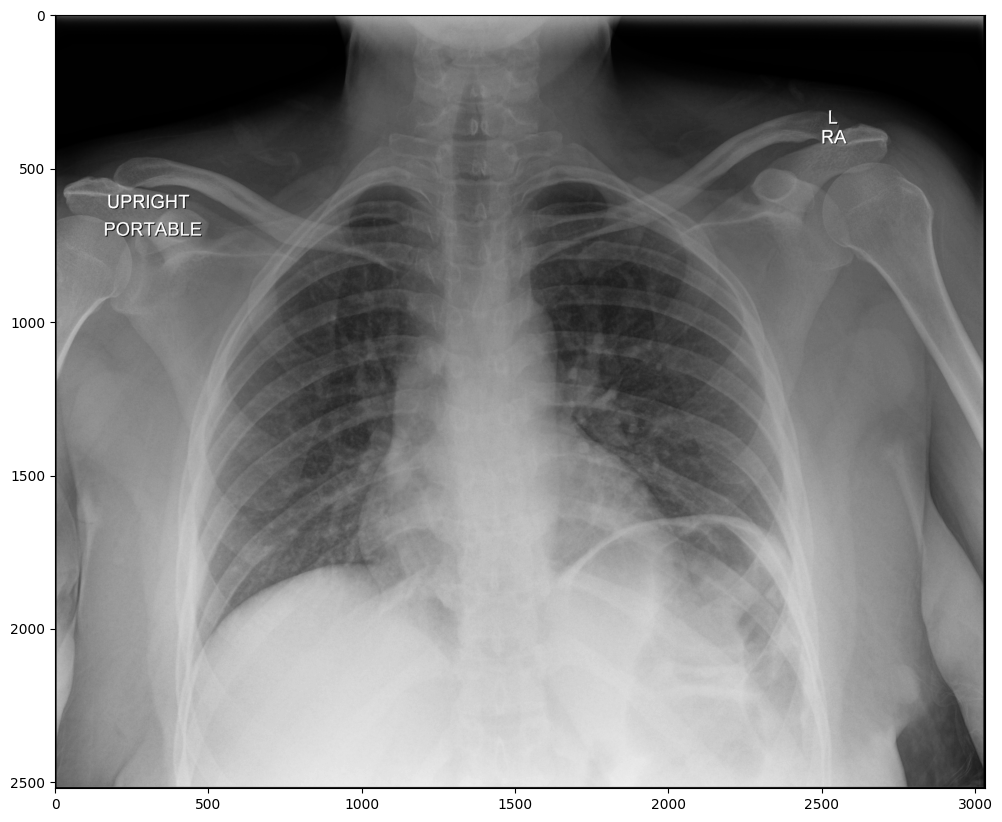

In [ ]:
plt.figure(figsize = (12,12))
plt.imshow(img, 'gray')

In [ ]:
df['img'] = df['file_nums'].apply(lambda x: [])

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,[]
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,[]
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,[]
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,[]
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,[]


In [ ]:
for i in tqdm(range(length)):
  list_files = df.iloc[i]['file_names']
  UID = df.iloc[i]['StudyInstanceUID']
  for file in list_files:
    df.iloc[i]['img'].append(read_xray(UID, file))

  0%|          | 0/2041 [00:00<?, ?it/s]

1.2.826.0.1.3680043.10.474.419639.281683063015421012243165106663 error
1.2.826.0.1.3680043.10.474.419639.281683063015421012243165106663 error
1.2.826.0.1.3680043.10.474.419639.634458571812963152584722403224 error
1.2.826.0.1.3680043.10.474.419639.634458571812963152584722403224 error
1.2.826.0.1.3680043.10.474.419639.318370773257162049352885666658 error
1.2.826.0.1.3680043.10.474.419639.157941891731263605984699258503 error
1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656 error
1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656 error
1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656 error
1.2.826.0.1.3680043.10.474.419639.141949053677605563923890349812 error
1.2.826.0.1.3680043.10.474.419639.202496920949067922388304599996 error
1.2.826.0.1.3680043.10.474.419639.332215508604035079612777142260 error
1.2.826.0.1.3680043.10.474.419639.332215508604035079612777142260 error
1.2.826.0.1.3680043.10.474.419639.177123263229379256808092070097 error
1.2.82

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_v2.h5', 'wb') as f:
  dump(df, f)

In [ ]:
text = ['1.2.826.0.1.3680043.10.474.419639.281683063015421012243165106663',
'1.2.826.0.1.3680043.10.474.419639.281683063015421012243165106663',
'1.2.826.0.1.3680043.10.474.419639.634458571812963152584722403224',
'1.2.826.0.1.3680043.10.474.419639.634458571812963152584722403224',
'1.2.826.0.1.3680043.10.474.419639.318370773257162049352885666658',
'1.2.826.0.1.3680043.10.474.419639.157941891731263605984699258503',
'1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656',
'1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656',
'1.2.826.0.1.3680043.10.474.419639.337243595782249124507607428656',
'1.2.826.0.1.3680043.10.474.419639.141949053677605563923890349812',
'1.2.826.0.1.3680043.10.474.419639.202496920949067922388304599996',
'1.2.826.0.1.3680043.10.474.419639.332215508604035079612777142260',
'1.2.826.0.1.3680043.10.474.419639.332215508604035079612777142260',
'1.2.826.0.1.3680043.10.474.419639.177123263229379256808092070097',
'1.2.826.0.1.3680043.10.474.419639.177123263229379256808092070097',
'1.2.826.0.1.3680043.10.474.419639.176075477086861214877289083940',
'1.2.826.0.1.3680043.10.474.419639.176075477086861214877289083940',
'1.2.826.0.1.3680043.10.474.419639.308766593694494383023478995060',
'1.2.826.0.1.3680043.10.474.419639.114580158702230915505323582012',
'1.2.826.0.1.3680043.10.474.419639.261082837342588557260534651385',
'1.2.826.0.1.3680043.10.474.419639.226067998397547238908362817992',
'1.2.826.0.1.3680043.10.474.419639.180724138980506057497339922541',
'1.2.826.0.1.3680043.10.474.419639.278971580757936878281862525234',
'1.2.826.0.1.3680043.10.474.419639.120025652450111763228352513628']

In [ ]:
len(text)

24

In [ ]:
df[df['StudyInstanceUID'] == '2.16.840.1.114274.1818.50240538143409486552948411458244648886']

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img,check
1828,1860,2.16.840.1.114274.1818.50240538143409486552948...,3,1,2,1,5,[2.16.840.1.114274.1818.4971597352394628631182...,2,"[None, None]",True


In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img,check
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[False, False, False, False, False, False, Fa..."
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[False, False, False, False, False, False, Fa..."
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[False, False, False, False, False, False, Fa..."
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[False, False, False, False, False, False, Fa..."
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[False, False, False, False, False, False, Fa..."


In [ ]:
df['check'] = df['StudyInstanceUID'].apply(lambda x: x[:4] == '2.16')

In [ ]:
df_top = df[df['check'] == False]

In [ ]:
df_bottom = df[df['check'] == True]

In [ ]:
df_top = df_top.drop(['check'], axis=1)

In [ ]:
df_top.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
from google.colab import files
df_top.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_bottom = df_bottom.drop(['check'], axis=1)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_1.h5', 'wb') as f:
  dump(df_top, f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_2.h5', 'wb') as f:
  dump(df_bottom, f)

# Import Medical Image Part 2

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_2.h5', 'rb') as f:
  df = load(f)

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
1465,1485,2.16.840.1.114274.1818.55811358227559407801037...,0,0,0,0,0,[2.16.840.1.114274.1818.5512992423877312936155...,1,[None]
1466,1486,2.16.840.1.114274.1818.49769291698741366729758...,0,0,0,0,0,[2.16.840.1.114274.1818.4883119182987585200563...,1,[None]
1467,1487,2.16.840.1.114274.1818.56188717436697446814119...,0,0,2,1,2,[2.16.840.1.114274.1818.4859366288225885718718...,1,[None]
1468,1488,2.16.840.1.114274.1818.56149990621591825958397...,4,3,4,3,24,[2.16.840.1.114274.1818.5108390314362421979437...,2,"[None, None]"
1469,1489,2.16.840.1.114274.1818.55647158179580425401548...,4,3,4,3,24,[2.16.840.1.114274.1818.4624602837639053576541...,2,"[None, None]"


In [ ]:
df['img'] = df['index'].apply(lambda x : [])

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
1465,1485,2.16.840.1.114274.1818.55811358227559407801037...,0,0,0,0,0,[2.16.840.1.114274.1818.5512992423877312936155...,1,[]
1466,1486,2.16.840.1.114274.1818.49769291698741366729758...,0,0,0,0,0,[2.16.840.1.114274.1818.4883119182987585200563...,1,[]
1467,1487,2.16.840.1.114274.1818.56188717436697446814119...,0,0,2,1,2,[2.16.840.1.114274.1818.4859366288225885718718...,1,[]
1468,1488,2.16.840.1.114274.1818.56149990621591825958397...,4,3,4,3,24,[2.16.840.1.114274.1818.5108390314362421979437...,2,[]
1469,1489,2.16.840.1.114274.1818.55647158179580425401548...,4,3,4,3,24,[2.16.840.1.114274.1818.4624602837639053576541...,2,[]


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(['level_0'], axis=1)

In [ ]:
df.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,1485,2.16.840.1.114274.1818.55811358227559407801037...,0,0,0,0,0,[2.16.840.1.114274.1818.5512992423877312936155...,1,[]
1,1486,2.16.840.1.114274.1818.49769291698741366729758...,0,0,0,0,0,[2.16.840.1.114274.1818.4883119182987585200563...,1,[]
2,1487,2.16.840.1.114274.1818.56188717436697446814119...,0,0,2,1,2,[2.16.840.1.114274.1818.4859366288225885718718...,1,[]
3,1488,2.16.840.1.114274.1818.56149990621591825958397...,4,3,4,3,24,[2.16.840.1.114274.1818.5108390314362421979437...,2,[]
4,1489,2.16.840.1.114274.1818.55647158179580425401548...,4,3,4,3,24,[2.16.840.1.114274.1818.4624602837639053576541...,2,[]


In [ ]:
df.iloc[0]['StudyInstanceUID']

'2.16.840.1.114274.1818.558113582275594078010370386816588461503'

In [ ]:
def read_xray(UID, file_name, voi_lut = True, fix_monochrome = False):
    path = '/content/drive/MyDrive/Colab Notebooks/Medical Image/data/img_compact/' + UID + '/' + file_name
    with zipfile.ZipFile(path,"r") as zip_ref:
      zip_ref.extractall("targetdir")
      file_name = file_name[:-4]
      new_path = 'targetdir/' + file_name
      try:
        list = []
        for file in os.listdir(new_path):
          list.append(str(file))
        print(list)
        new_path += '/' + list[0]
        print('here')
        print(new_path)
        dicom = pydicom.read_file(new_path)
        zip_ref.close()
      except Exception as e:
        print(e)
        print(f'{UID} error')
        return None
    try:
          # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
      if voi_lut:
          print('here')
          data = apply_voi_lut(dicom.pixel_array, dicom)
      else:
        data = dicom.pixel_array
      print(dicom.PhotometricInterpretation)

    # depending on this value, X-ray may look inverted - fix that:
      if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
          data = np.amax(data) - data

      data = data - np.min(data)
      data = data / np.max(data)
      data = (data * 255).astype(np.uint8)
    except Exception as e:
      print(e)
      print(f'{UID} error')
      return None

    return data

In [ ]:
img = read_xray(df.iloc[0]['StudyInstanceUID'], df.iloc[0]['file_names'][0])

['2.16.840.1.114274.1818.53377418018144963343348741339028892302.dcm']
here
targetdir/2.16.840.1.114274.1818.551299242387731293615592020862815882377/2.16.840.1.114274.1818.53377418018144963343348741339028892302.dcm
here
The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )
2.16.840.1.114274.1818.558113582275594078010370386816588461503 error


In [ ]:
from google.colab import files
df.to_csv('data_2.csv', encoding = 'utf-8-sig')
files.download('data_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Import Medical Image Part 3

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_1.h5', 'rb') as f:
  df_top = load(f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_3.h5', 'rb') as f:
  df_bottom = load(f)

In [ ]:
df_top.head()

,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
df_bottom.head()

,Unnamed: 0,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,0,1485,2.16.840.1.114274.1818.55811358227559407801037...,0,0,0,0,0,[2.16.840.1.114274.1818.5512992423877312936155...,1,"[[[0, 173, 172, 171, 170, 170, 171, 171, 170, ..."
1,1,1486,2.16.840.1.114274.1818.49769291698741366729758...,0,0,0,0,0,[2.16.840.1.114274.1818.4883119182987585200563...,1,"[[[0, 173, 172, 171, 170, 170, 171, 171, 170, ..."
2,2,1487,2.16.840.1.114274.1818.56188717436697446814119...,0,0,2,1,2,[2.16.840.1.114274.1818.4859366288225885718718...,1,"[[[0, 0, 0, 0, 13, 13, 13, 13, 13, 13, 13, 13,..."
3,3,1488,2.16.840.1.114274.1818.56149990621591825958397...,4,3,4,3,24,[2.16.840.1.114274.1818.5108390314362421979437...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,4,1489,2.16.840.1.114274.1818.55647158179580425401548...,4,3,4,3,24,[2.16.840.1.114274.1818.4624602837639053576541...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
frames = [df_top, df_bottom]

In [ ]:
df = pd.concat(frames, ignore_index=False)

In [ ]:
df = df.reset_index()

In [ ]:
df

,level_0,index,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img,Unnamed: 0
0,0,0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
1,1,1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
2,2,2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
3,3,3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
4,4,4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2036,571,2074,2.16.840.1.114274.1818.47009006266074201391232...,2,1,4,2,10,[2.16.840.1.114274.1818.5254090932016071315151...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",571.0
2037,572,2075,2.16.840.1.114274.1818.53805723079689771793338...,4,3,4,2,20,[2.16.840.1.114274.1818.5621028653559392606127...,2,"[[[0, 1, 1, 1, 1, 255, 255, 255, 255, 255, 1, ...",572.0
2038,573,2076,2.16.840.1.114274.1818.51276944681387734271538...,4,3,4,3,24,[2.16.840.1.114274.1818.4841182439955515914163...,1,"[[[13, 10, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,...",573.0
2039,574,2077,2.16.840.1.114274.1818.50718068720660864987980...,3,3,3,3,18,[2.16.840.1.114274.1818.4661938623498903313102...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",574.0


In [ ]:
df = df.drop(['level_0', 'index'], axis=1)

In [ ]:
df

,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img,Unnamed: 0
0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN
...,...,...,...,...,...,...,...,...,...,...
2036,2.16.840.1.114274.1818.47009006266074201391232...,2,1,4,2,10,[2.16.840.1.114274.1818.5254090932016071315151...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",571.0
2037,2.16.840.1.114274.1818.53805723079689771793338...,4,3,4,2,20,[2.16.840.1.114274.1818.5621028653559392606127...,2,"[[[0, 1, 1, 1, 1, 255, 255, 255, 255, 255, 1, ...",572.0
2038,2.16.840.1.114274.1818.51276944681387734271538...,4,3,4,3,24,[2.16.840.1.114274.1818.4841182439955515914163...,1,"[[[13, 10, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,...",573.0
2039,2.16.840.1.114274.1818.50718068720660864987980...,3,3,3,3,18,[2.16.840.1.114274.1818.4661938623498903313102...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",574.0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
line = df.iloc[0]

In [ ]:
type(line['file_names'])

list

In [ ]:
type(line['img'])

list

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_complete.h5', 'wb') as f:
  dump(df, f)

# Data Preview

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Medical Image/data/df_complete.h5', 'rb') as f:
  df = load(f)

In [ ]:
df.head()

,StudyInstanceUID,extent_right_numerical,density_right_numerical,extent_left_numerical,density_left_numerical,mRALE Score,file_names,file_nums,img
0,1.2.826.0.1.3680043.10.474.419639.280560458539...,4,3,4,2,20,[1.2.826.0.1.3680043.10.474.419639.31262988523...,2,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1.2.826.0.1.3680043.10.474.419639.316579237354...,3,3,3,2,15,[1.2.826.0.1.3680043.10.474.419639.23300867738...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,1.2.826.0.1.3680043.10.474.419639.119686652556...,1,1,1,1,2,[1.2.826.0.1.3680043.10.474.419639.28821287723...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,1.2.826.0.1.3680043.10.474.419639.427770385556...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.20424422721...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,1.2.826.0.1.3680043.10.474.419639.298049151358...,0,0,0,0,0,[1.2.826.0.1.3680043.10.474.419639.17007173102...,1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
def visualize(img):
  plt.figure(figsize = (8,8))
  plt.imshow(img, 'gray')
  plt.show()

In [ ]:
length = len(df)

In [ ]:
length

2041

In [ ]:
import random
randomlist = []
for i in range(5):
  n = random.randint(0,length)
  randomlist.append(n)
print(randomlist)

[1497, 658, 1320, 324, 519]


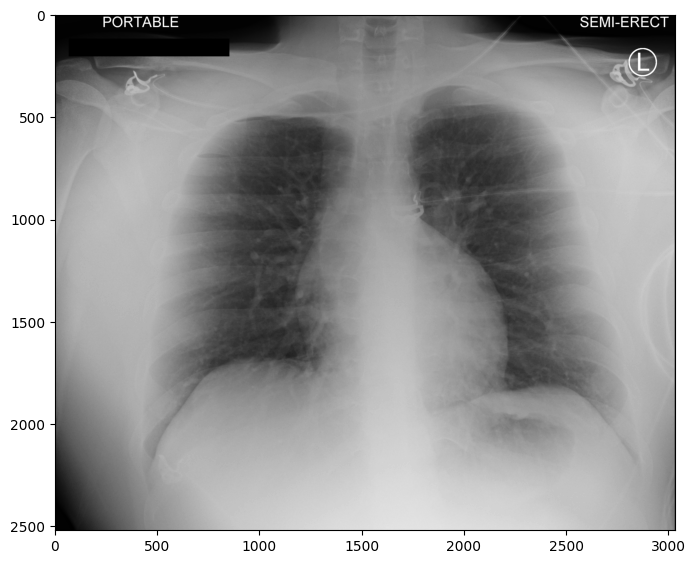

In [ ]:
visualize(df.iloc[randomlist[0]]['img'][0])

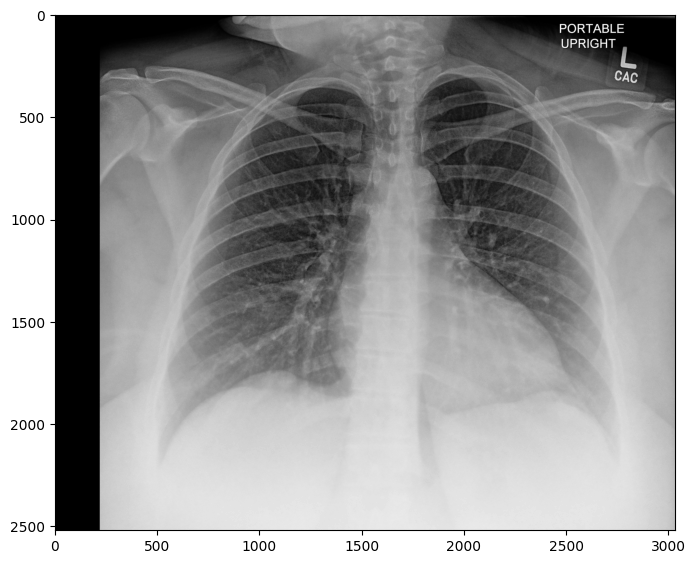

In [ ]:
visualize(df.iloc[randomlist[1]]['img'][0])

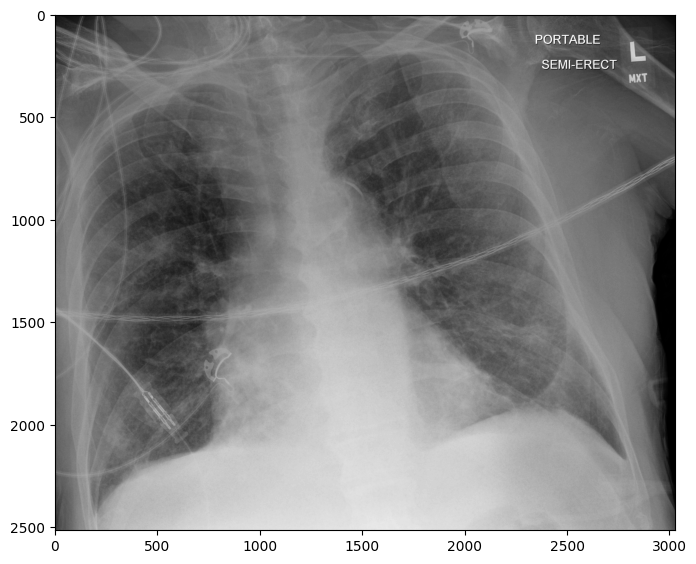

In [ ]:
visualize(df.iloc[randomlist[3]]['img'][0])

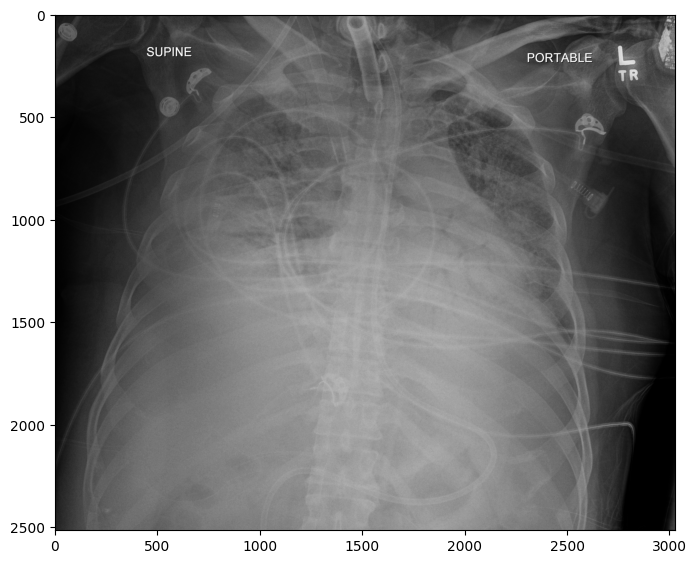

In [ ]:
visualize(df.iloc[randomlist[4]]['img'][0])